# Bias Events - Feature Engineering for Training

## Source Data

- dummy_narrative_github.csv
- train_report_ids.csv
- test_report_ids.csv
- completed_tasks.csv
- offenses.csv

## Engineered Features

The output datasets (one for training and one for testing) contain the classification label, and 141 resulting features including:

- 'victim_age_1','subject_age_1','East', 'North', 'precinct_OOJ', 'South', 'Southwest', 'West', 'precinct_Unknown',
 'Female','Gender Diverse (gender non-conforming and/or transgender)', 'Male', 'Vic_Gender_Unknown',
 'American Indian or Alaska Native', 'Asian', 'Black or African American', 'Native Hawaiian or Other Pacific Islander',
 'Vic_Race_Unknown', 'White', 'Hispanic Or Latino', 'Not Hispanic Or Latino', 'Vic_Ethni_Unknown',
 'subject_American Indian or Alaska Native', 'subject_Asian', 'subject_Black or African American',
 'subject_Native Hawaiian or Other Pacific Islander', 'subject_Sub_Race_Unknown', 'subject_White',
 'subject_Female', 'subject_Gender Diverse (gender non-conforming and/or transgender)',
 'subject_Male', 'subject_Sub_Gender_Unknown', 'subject_Hispanic Or Latino', 'subject_Not Hispanic Or Latino',
 'subject_Sub_Ethni_Unknown', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'D3', 'E1', 'E2', 'E3', 'F1', 'F2',
 'F3', 'G1', 'G2', 'G3', 'H1', 'H2', 'H3', 'J1', 'J2', 'J3', 'K1', 'K2', 'K3', 'L1', 'L2', 'L3', 'M1', 'M2', 'M3',
 'N1', 'N2', 'N3', 'O1', 'O2', 'O3', 'Q1', 'Q2', 'Q3', 'R1', 'R2', 'R3', 'S1', 'S2', 'S3', 'U1', 'U2', 'U3',
 'beat_Unknown', 'W1', 'W2', 'W3', 'beat_OOJ'
 <br>
 
- 50 text features

In SPD's fully productionized implementation, we generate 3,000 text features.

## Main Dataset Description

The 'dummy_narrative_github.csv' file is a dummy dataset of SPD's bias crimes dataset, which contains a row per every unique Incident/Offense report in SPD's historical data. The reporting event number and report ID columns are unique identifiers for every report. The original dataset has 1.6 million rows (i.e., reports) and is updated every month to include new reports, which increases the size of the dataset. The bias crimes dataset is created in a separate data engineering process using the 'incident_offense.csv' data. Specifically, the incident_offense dataset includes one row per unique offense, which implies that there are as many rows as offenses per report. As such, we pivot the data to include one unique column per offense, victim, and suspect for each report. This is the same process performed in the bias_crime_feature_engineering_for_inference_github notebook, which only processes reports occurred within the last 24 hours.

The dummy dataset was created with randomly generated unique identifiers, as well as AI-generated narratives. To minimize processing time, it only includes 400 unique dummy reports. The dataset additionally includes columns for:

- __Event start date__: the date and time of occurrence.
- __Approval status__: the status of report approval, which can include 'Draft,' 'Rejected,' 'Pending Supervisor Review,' 'UCR Approved,' and 'Completed.' We only use approved/completed reports for training as other status indicates that reports might be modified/corrected.
- __Precinct__: precinct where event occurred.
- __Beat__: beat where event occurred. Beats are geographic divisions to which patrol officers are assigned. 
- __Crime Description__: the description of the first offense code in the report.
- __Victim demographics__: a column is included for age, ethnicity, gender, and race.
- __Suspect (subject) demographics__: a column is included for age, ethnicity, gender, and race.
- __Narrative__: the event narrative from the I/O report.


## Feedback Process

At SPD, a 'New Bias Crime Confirmation' RMS task is created and assigned to the Bias Crime Unit for every report that gets a positive prediction so that the report is reviewed and adjusted as needed: 

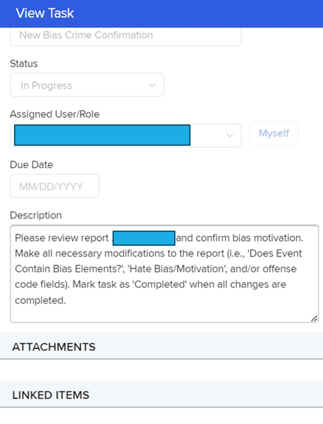

As such, when updating the training data, we read an RMS record table of completed tasks, a log of calls to the RMS API, and the updated report fields to relabel reports accordingly. The 'offenses.csv' file contains the 'is_suspected_hate_crime' column, which would be one of the fields updated by the bias crime unit.

### *Manual Approach*

In the bias_crime_XGBOOST_daily_predictions notebook, a .csv file is created for daily positive predictions. This .csv file can be sent to the Bias Crime Unit. They can consequently create a .csv file with the report identifiers of the tasks that have been completed. These reports would then be updated according to the information in the offenses.csv file (which is assumed to have been updated by the Bias Crime Unit). 

## Natural Language Processing (NLP)

Several NLP techniques exist for text vectorization/embedding. We tested several of these options at SPD, including an optimized implementation of Word2Vec (AWS BlazingText). However, a simple CountVectorizer showed the best performance in our application. We provide code to implement this technique using scikit-learn's implementation.

We train the vectorizer only on the training data to prevent data leakage. We save the trained object to use for the inference feature engineering process.